In [2]:
import pandas as pd
import numpy as np
from bs4 import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.rcParams["patch.force_edgecolor"] = True
sns.set()

In [3]:
"""Load data"""
df = pd.read_csv('Data/production_xmldata.2017-07-10_PROCESSED.csv')

In [67]:
#Vector of class 
classes = df.columns[np.where(df.columns=='LFT')[0][0]:]
#Unique values in each column
df.apply(lambda x: x.unique().size)

date                       1
time                   42016
height                   156
width                    191
length                   309
volume                 20942
weight                   865
angle                   1280
gap                     2434
velocity                 104
velocity_units             1
belt_velocity            124
belt_velocity_units        2
LFT                        2
TooBig                     2
NoRead                     2
ValidDim                   2
MultiRead                  2
Irreg                      2
TooSmall                   2
Gap                        2
dtype: int64

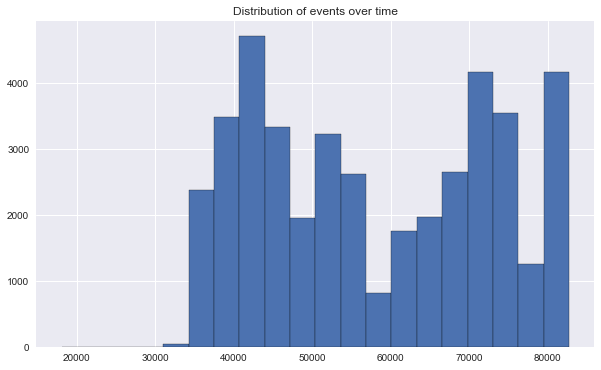

NOTICE DIFFERENCES IN Y-AXIS


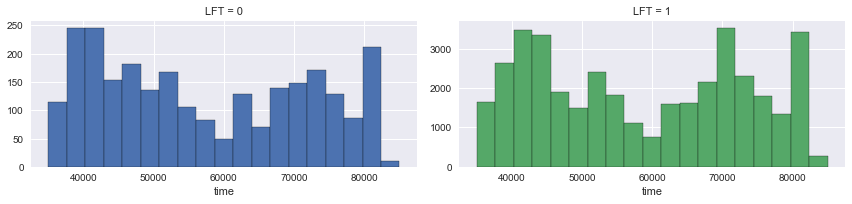

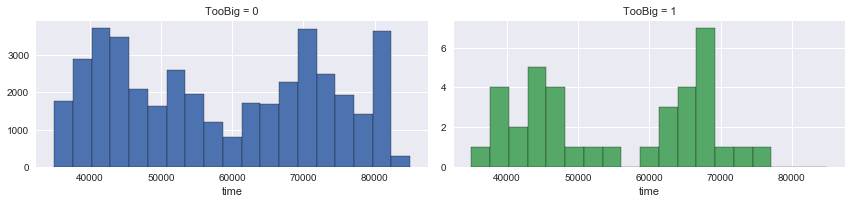

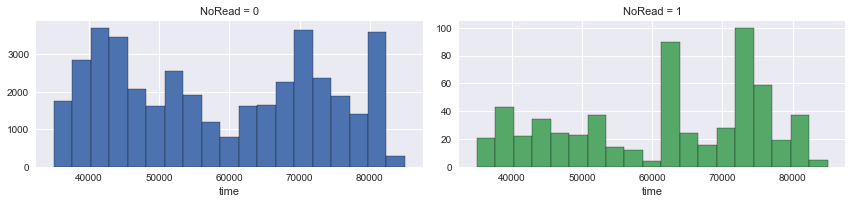

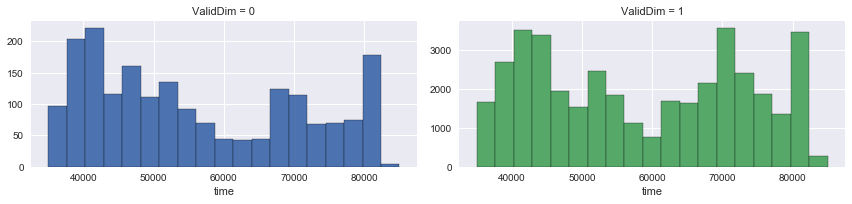

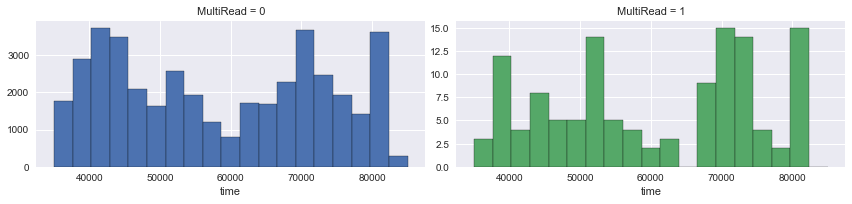

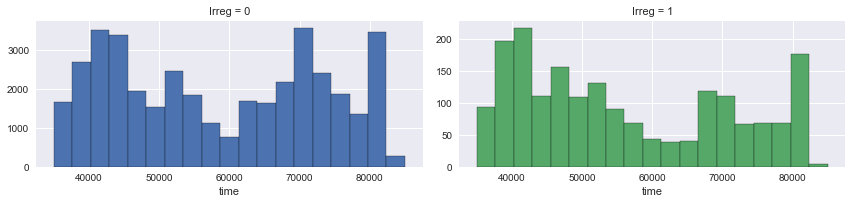

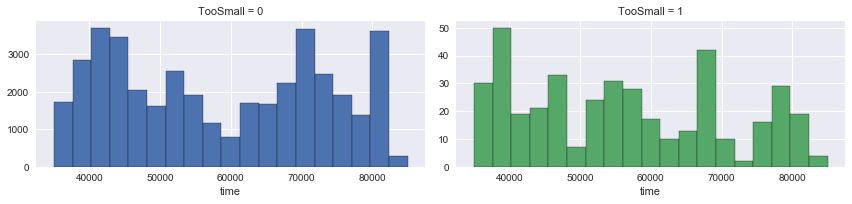

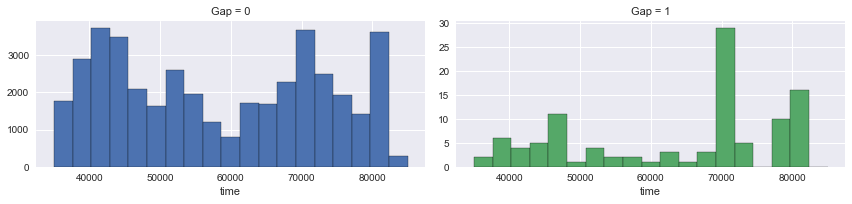

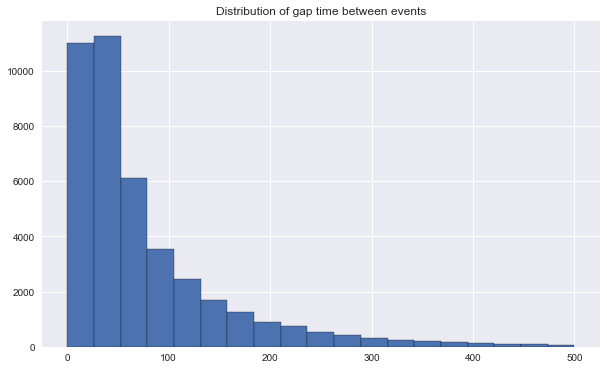

In [91]:
#Distribution of events over time
plt.hist(df.time,bins=20)
plt.title('Distribution of events over time')
plt.show()

#Distribution of each class over time
print('NOTICE DIFFERENCES IN Y-AXIS')
bins = np.linspace(35000,85000,20)
for c in classes:
    g = sns.FacetGrid(df,col=c,hue=c,sharey=False,aspect=2)
    g.map(plt.hist,'time',bins=bins)
    plt.show()
    
#Distribution of spacing between events
bins = np.linspace(0,500,20)
plt.hist(df.gap,bins=bins)
plt.title('Distribution of gap time between events')
plt.show()

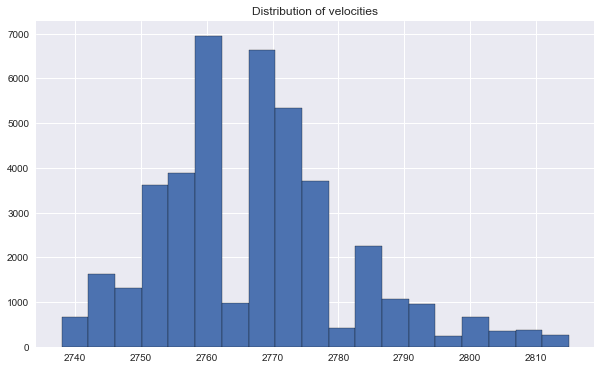

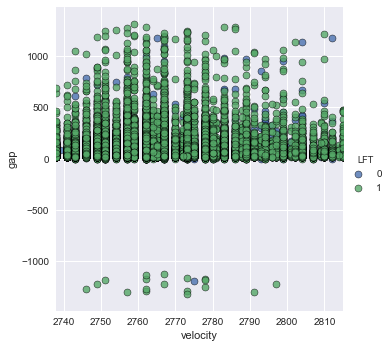

In [96]:
#Distribution of velocities
bins = np.linspace(df.velocity.quantile(.01),df.velocity.quantile(.99),20)
plt.hist(df.velocity,bins=bins)
plt.title('Distribution of velocities')
plt.show()

sns.lmplot('velocity','gap',df,'LFT',scatter_kws={'edgecolor':'k','linewidth':.5},fit_reg=False)
plt.xlim(df.velocity.quantile(.01),df.velocity.quantile(.99))
plt.show()